# **Projeto**

### **Importação dos dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import GoogleV3
from configparser import ConfigParser

C:\ProgramData\Anaconda3\envs\cdia\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
cmap_blues = plt.cm.get_cmap('Blues')

In [3]:
data = pd.read_csv('data/estudantes-pucsp.tsv', sep='\t')
data = data.rename(columns={'cod_curso': 'curso'})


legenda = {
    'cor': {
        1: 'branca',
        2: 'preta',
    },
    'sexo': {
        1: 'masculino',
        2: 'feminino',
    },
    'curso': {
        1: 'ciência de dados',
        2: 'direito',
        3: 'medicina',
        4: 'história',
        5: 'administração',
        6: 'engenharia biomédica',
        7: 'design',
        8: 'ciência da computação',
        9: 'filosofia',
    },
    'escola': {
        1: 'pública',
        2: 'privada',
    }
}
data = data.replace(legenda)


duracao_curso = {
    'ciência de dados': 3.5,
    'direito': 5,
    'medicina': 6,
    'história': 4,
    'administração': 4,
    'engenharia biomédica': 5,
    'design': 3,
    'ciência da computação': 4,
    'filosofia': 3,
}

data['porcentagem_concluida_curso'] = pd.NA
for index, aluno in data.iterrows():
    data.loc[index, ['porcentagem_concluida_curso']] = data['ano_curso'][index]/duracao_curso[data['curso'][index]]


data

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,curso,logradouro,numero,bairro,cidade,uf,cep,motivação,porcentagem_concluida_curso
0,RA55000001,Aldelita Dinis,19,339.00,branca,feminino,3,pública,medicina,Rua Major Ari Gomes,118,Vila Mazzei,São Paulo,SP,02309-050,10,0.5
1,RA55000002,Leudo Campelo Ouro,19,373.00,branca,masculino,3,pública,design,Rua Caetano Mero,60,Vila Constança,São Paulo,SP,04658-080,10,1.0
2,RA55000003,Geisemara Gonçalves,19,121.00,branca,feminino,3,pública,ciência de dados,Rua Vinte e Um de Abril,334,Jardim Colibri,São Paulo,SP,04855-620,9,0.857143
3,RA55000004,Clislene Cantanhede,19,518.00,branca,feminino,3,pública,ciência de dados,Rua Caetano de Moura,216,Vila Nina,São Paulo,SP,02833-060,10,0.857143
4,RA55000005,Apolonia Arantes Ruas Pacheco,19,284.00,branca,feminino,3,pública,administração,Rua Curruíra,550,Vila Aurora,São Paulo,SP,05186-200,10,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RA55000496,Emanuelly Negromonte,46,15074.95,preta,feminino,1,privada,filosofia,Rua Sargento Agostinho Ferreira,927,Vila Maria,São Paulo,SP,02129-001,0,0.333333
496,RA55000497,Macalister Ruas Paredes Sintra,38,701726.52,branca,masculino,3,privada,ciência da computação,Rua Marechal Silva Fonseca,104,Jardim Três Marias,São Paulo,SP,03676-030,0,0.75
497,RA55000498,Leviston Vilaverde Borba,37,945542.00,branca,masculino,3,privada,ciência de dados,Rua Treze de Maio,267,Bela Vista,São Paulo,SP,01327-905,0,0.857143
498,RA55000499,Gerlani Albernaz Garcez,29,606764.31,branca,feminino,2,privada,administração,Rua Sete de Abril,787,Centro,São Paulo,SP,01044-902,1,0.5


### **Análise preliminar dos dados**

##### **Descrição estatística dos dados**

In [4]:
data.describe()

,idade,renda,ano_curso,numero,motivação
count,500.000000,500.00000,500.000000,500.000000,500.000000
mean,21.404000,8353.38346,3.618000,564.372000,5.948000
std,4.923135,67272.57730,0.978771,286.546924,3.181437
min,19.000000,17.00000,1.000000,7.000000,0.000000
25%,19.000000,1179.99000,3.000000,325.250000,3.000000
50%,20.000000,1846.38000,4.000000,574.000000,7.000000
75%,21.000000,2759.37000,4.000000,820.000000,9.000000
max,50.000000,945542.00000,5.000000,997.000000,10.000000


In [5]:
data.describe(include='object')

,matrícula,nome,cor,sexo,escola,curso,logradouro,bairro,cidade,uf,cep,porcentagem_concluida_curso
count,500,500,500,500,500,500,500,500,500,500,500,500.0
unique,500,500,2,2,2,9,208,171,1,1,227,19.0
top,RA55000001,Aldelita Dinis,branca,feminino,privada,história,Avenida Nove de Julho,Centro,São Paulo,SP,02404-001,1.0
freq,1,1,430,250,264,67,9,15,500,500,7,137.0


##### **Idade**

In [6]:
data['idade'].describe()

count    500.000000
mean      21.404000
std        4.923135
min       19.000000
25%       19.000000
50%       20.000000
75%       21.000000
max       50.000000
Name: idade, dtype: float64

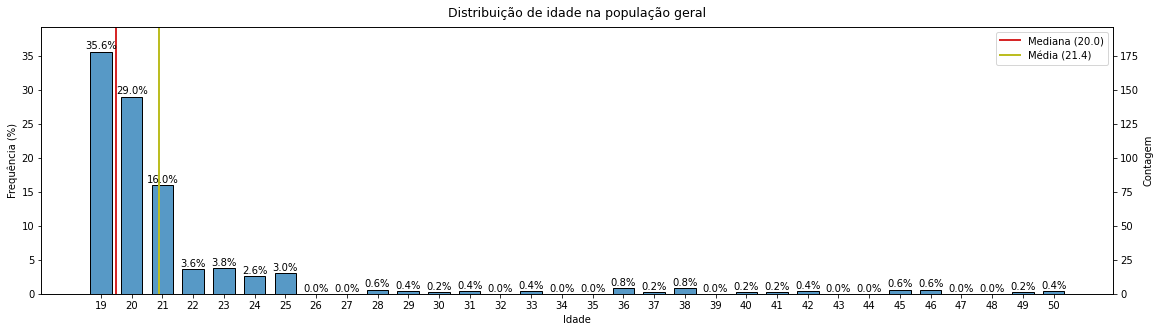

In [7]:
fig, ax1 = plt.subplots(figsize=(16, 4.5), constrained_layout=True)

graph = sns.histplot(data['idade'], bins=np.arange(data['idade'].min(), data['idade'].max()+2, 1), ax=ax1, shrink=0.7)
graph.axvline(data['idade'].quantile(0.5), label='Mediana', color='C3', linewidth=2, linestyle='-')
graph.axvline(data['idade'].mean(), label='Média', color='C8', linewidth=2, linestyle='-')
graph.legend(labels=[f'Mediana ({data["idade"].quantile(0.5):.1f})', f'Média ({data["idade"].mean():.1f})'])

xticks_location = [p.get_x() + p.get_width()/2 for p in ax1.patches]
graph.set_xticks(xticks_location, range(data['idade'].min(), data['idade'].max()+1, 1))

ax2 = ax1.twinx()
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax1.set_ylabel('Contagem')
ax2.set_ylabel('Frequência (%)')
ax1.set_ylim(ax1.get_ylim()[0], 1.05*ax1.get_ylim()[1])
ax2.set_ylim(0, 100*(ax1.get_ylim()[1]/data['idade'].count()))

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
    # ax1.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

graph.set(xlabel='Idade', ylabel='Contagem')
graph.set_title('Distribuição de idade na população geral', pad=10, fontdict={'fontsize': 12.5, 'fontweight': 10})

plt.show()

fig.savefig('imagens/Distribuição de idade na população geral.svg')

##### **Renda**

In [8]:
data['renda'].describe()

count       500.00000
mean       8353.38346
std       67272.57730
min          17.00000
25%        1179.99000
50%        1846.38000
75%        2759.37000
max      945542.00000
Name: renda, dtype: float64

In [9]:
renda_IQR = data['renda'].quantile(0.75) - data['renda'].quantile(0.25)
renda_filter = (data['renda'] >= data['renda'].quantile(0.25) - 1.5*renda_IQR) & (data['renda'] <= data['renda'].quantile(0.75) + 1.5*renda_IQR)

In [85]:
data['renda'][renda_filter].describe()

count     454.000000
mean     1885.450308
std      1023.640566
min        17.000000
25%      1134.240000
50%      1730.430000
75%      2352.790000
max      5099.640000
Name: renda, dtype: float64

C:\ProgramData\Anaconda3\envs\cdia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


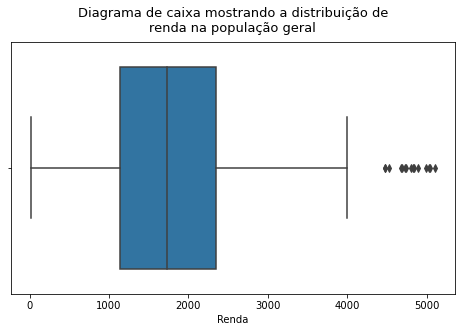

In [10]:
fig, axs = plt.subplots(figsize=(6.3, 4.5), constrained_layout=True)

graph = sns.boxplot(data['renda'][renda_filter], ax=axs)
graph.set(xlabel='Renda')
graph.set_title('Diagrama de caixa mostrando a distribuição de\nrenda na população geral', pad=10, fontdict={'fontsize': 13, 'fontweight': 10})
plt.show()

fig.savefig('imagens/Diagrama de caixa mostrando a distribuição de renda na população geral.svg')

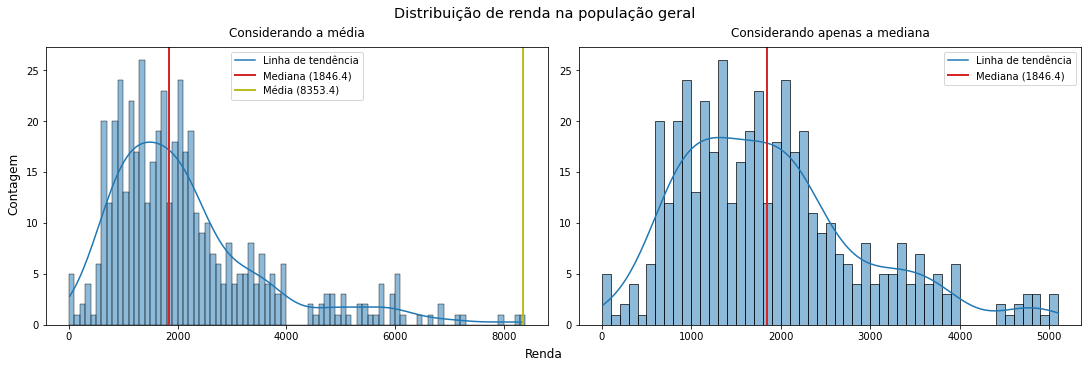

In [308]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), constrained_layout=True)

graph_1 = sns.histplot(data['renda'][data['renda'] <= data['renda'].mean()], bins=np.arange(0, data['renda'].mean()+100, 100), kde=True, ax=axs[0])
graph_1.set(xlabel='', ylabel='')
graph_1.axvline(data['renda'].quantile(0.5), label='Mediana', color='C3', linewidth=2, linestyle='-')
graph_1.axvline(data['renda'].mean(), label='Média', color='C8', linewidth=2, linestyle='-')
graph_1.legend(labels=['Linha de tendência', f'Mediana ({data["renda"].quantile(0.5):.1f})', f'Média ({data["renda"].mean():.1f})'])
graph_1.set_title('Considerando a média', pad=10)

graph_2 = sns.histplot(data['renda'][renda_filter], bins=np.arange(0, data['renda'][renda_filter].max()+1, 100), kde=True, ax=axs[1])
graph_2.set(xlabel='', ylabel='')
graph_2.axvline(data['renda'].quantile(0.5), label='Mediana', color='C3', linewidth=2, linestyle='-')
graph_2.legend(labels=['Linha de tendência', f'Mediana ({data["renda"].quantile(0.5):.1f})'])
graph_2.set_title('Considerando apenas a mediana', pad=10)

fig.supxlabel('Renda')
fig.supylabel('Contagem')
fig.suptitle('Distribuição de renda na população geral', fontsize=14.5)
plt.show()

fig.savefig('imagens/Distribuição de renda na população geral.svg')

##### **Cor**

In [8]:
data['cor'].value_counts()

branca    430
preta      70
Name: cor, dtype: int64

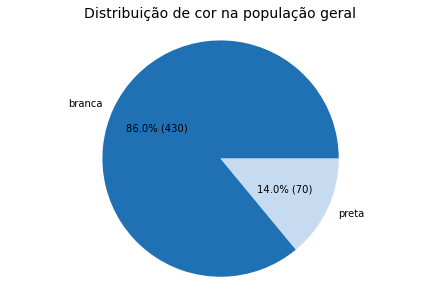

In [23]:
fig, axs = plt.subplots(constrained_layout=True)

cor_labels = data['cor'].value_counts().index
cor_values = data['cor'].value_counts().values

graph = axs.pie(cor_values, labels=cor_labels, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*cor_values.sum():n})')
axs.axis('equal')
axs.set_title('Distribuição de cor na população geral', pad=10, fontdict={'fontsize': 14, 'fontweight': 10})
plt.show()

fig.savefig('imagens/Distribuição de cor na população geral.svg')

##### **Sexo**

In [14]:
data['sexo'].value_counts()

feminino     250
masculino    250
Name: sexo, dtype: int64

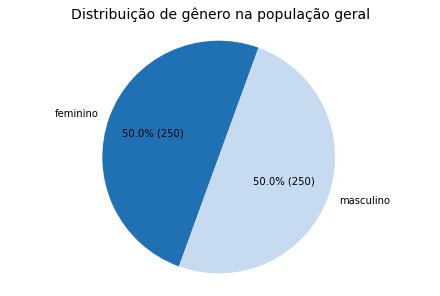

In [30]:
fig, axs = plt.subplots(constrained_layout=True)

sexo_labels = data['sexo'].value_counts().index
sexo_values = data['sexo'].value_counts().values

graph = axs.pie(sexo_values, labels=sexo_labels, startangle=70, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*sexo_values.sum():n})')
axs.axis('equal')
axs.set_title('Distribuição de gênero na população geral', pad=10, fontdict={'fontsize': 14, 'fontweight': 10})
plt.show()

fig.savefig('imagens/Distribuição de gênero na população geral.svg')

##### **Curso**

In [16]:
data['curso'].describe()

count          500
unique           9
top       história
freq            67
Name: curso, dtype: object

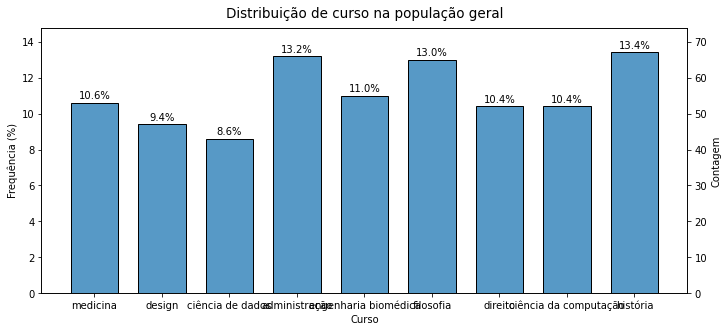

In [74]:
fig, ax1 = plt.subplots(figsize=(10, 4.5), constrained_layout=True)

graph = sns.histplot(data['curso'], ax=ax1, shrink=0.7)

ax2 = ax1.twinx()
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax1.set_ylabel('Contagem')
ax2.set_ylabel('Frequência (%)')
ax1.set_ylim(ax1.get_ylim()[0], 1.05*ax1.get_ylim()[1])
ax2.set_ylim(0, 100*(ax1.get_ylim()[1]/data['curso'].count()))

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
    # ax1.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

# ax1.set_xticklabels([], rotation=20)
graph.set(xlabel='Curso', ylabel='Contagem')
graph.set_title('Distribuição de curso na população geral', pad=10, fontdict={'fontsize': 13.5, 'fontweight': 10})

plt.show()

fig.savefig('imagens/Distribuição de curso na população geral.svg')

##### **Escola**

In [18]:
data['escola'].value_counts()

privada    264
pública    236
Name: escola, dtype: int64

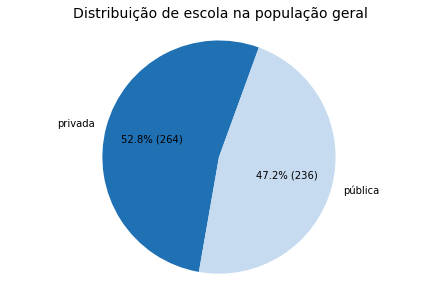

In [31]:
fig, axs = plt.subplots(constrained_layout=True)

escola_labels = data['escola'].value_counts().index
escola_values = data['escola'].value_counts().values

graph = axs.pie(escola_values, labels=escola_labels, startangle=70, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*escola_values.sum():n})')
axs.axis('equal')
axs.set_title('Distribuição de escola na população geral', pad=10, fontdict={'fontsize': 14, 'fontweight': 10})
plt.show()

fig.savefig('imagens/Distribuição de escola na população geral.svg')

##### **Localização**

In [20]:
data['cidade'].value_counts()

São Paulo    500
Name: cidade, dtype: int64

**Importação do mapa**

In [21]:
sp_map = gpd.read_file('data/shapefiles/DEINFO_DISTRITO.shp')
sp_map = sp_map.to_crs(4326)

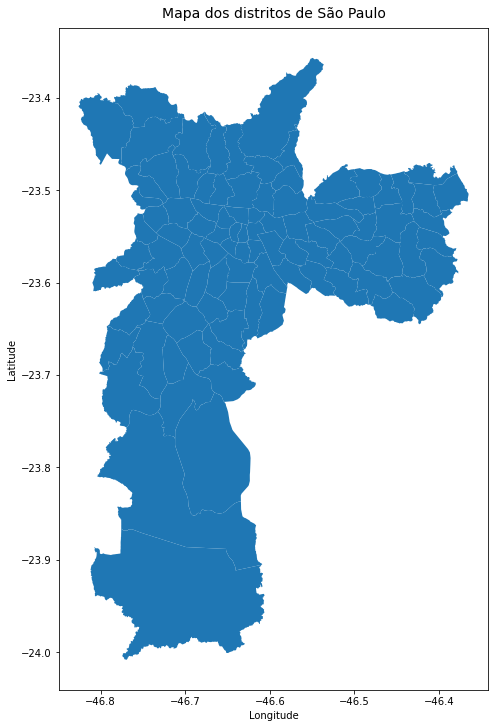

In [22]:
fig, axs = plt.subplots(figsize=(20, 10), constrained_layout=True)

sp_map.plot(ax=axs)

axs.set(xlabel='Longitude', ylabel='Latitude')
axs.set_title('Mapa dos distritos de São Paulo', pad=10, fontdict={'fontsize': 14, 'fontweight': 10})
plt.show()

fig.savefig('imagens/Mapa dos distritos de São Paulo.svg')

**Requisições na API de endereços**

In [23]:
config = ConfigParser()
config.read('data/credentials.cfg')
api_key= config.get('GOOGLE API', 'API_KEY')

In [24]:
# geolocator = GoogleV3(api_key=api_key)

# data['coordenadas_long_lat'] = pd.NA
# data['distrito'] = pd.NA

# for index, estudante in data.iterrows():
#     endereco = f'{estudante.logradouro}, {estudante.numero} - {estudante.bairro}, {estudante.cidade} - {estudante.uf}, Brasil, {estudante.cep}'
#     location = geolocator.geocode(endereco)

#     coordenadas = f'{location.longitude}, {location.latitude}'
#     data.loc[index, 'coordenadas_long_lat'] = coordenadas
    
#     try:
#         distrito = sp_map[sp_map.contains(Point(eval(coordenadas))) == True].NOME_DIST.iloc[0]
#     except:
#         distrito = sp_map.loc[sp_map.distance(Point(eval(coordenadas))).sort_values().index[0], 'NOME_DIST']
#     data.loc[index, 'distrito'] = distrito

# data.to_csv('data/data.csv', index=False)

In [309]:
data = pd.read_csv('data/data.csv')

In [27]:
quantidade_distrito = pd.DataFrame(data['distrito'].value_counts())
quantidade_distrito.index.names = ['NOME_DIST']

sp_map = sp_map.join(quantidade_distrito, on='NOME_DIST')
sp_map = sp_map.rename(columns={'distrito': 'count'})

sp_map['count'] = sp_map['count'].fillna(0)

**Criação do Mapa de Calor**

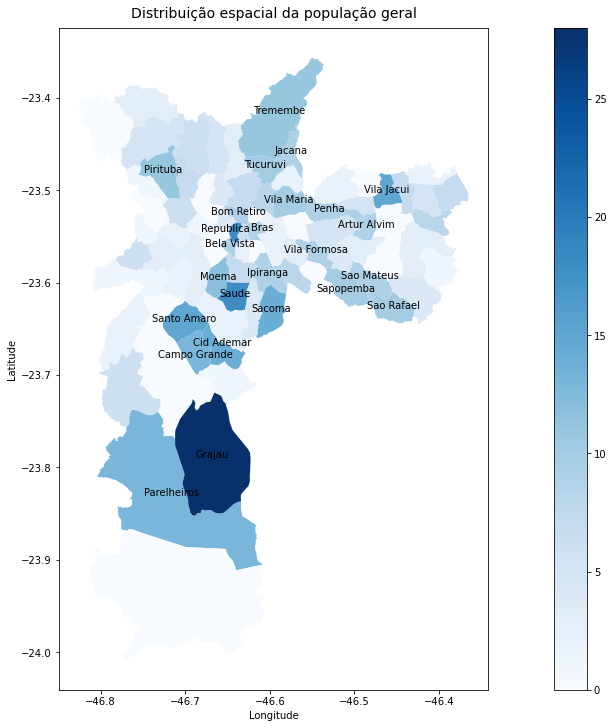

In [65]:
fig, axs = plt.subplots(figsize=(20, 10), constrained_layout=True)

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=sp_map['count'].min(), vmax=sp_map['count'].max()))

cbar = fig.colorbar(sm)

sp_map.plot('count', cmap='Blues', ax=axs)

for index, row in sp_map.iterrows():
    if row['count'] >= sp_map['count'].quantile(0.75):
        x = row['geometry'].centroid.x
        if row['NOME_DIST'].title() == 'Republica':
            x -= 0.012
        if row['NOME_DIST'].title() == 'Bras':
            x += 0.009
        
        y = row['geometry'].centroid.y
        if row['NOME_DIST'].title() == 'Campo Grande':
            y -= 0.006
        elif row['NOME_DIST'].title() == 'Cid Ademar':
            y += 0.006
        elif row['NOME_DIST'].title() == 'Sao Mateus':
            y += 0.004
        elif row['NOME_DIST'].title() == 'Sapopemba':
            y -= 0.004
        plt.annotate(row['NOME_DIST'].title(), xy=(x, y), ha='center')

# points = [Point(eval(coordenada)) for coordenada in data['coordenadas_long_lat']]
# geo_points = gpd.GeoDataFrame(geometry=points)
# geo_points.plot(ax=axs, marker='o', color='C3', markersize=5)

axs.set(xlabel='Longitude', ylabel='Latitude')
axs.set_title('Distribuição espacial da população geral', pad=10, fontdict={'fontsize': 14, 'fontweight': 10})
plt.show()

fig.savefig('imagens/Distribuição espacial da população geral.svg')

##### **Motivação**

In [80]:
data['motivação'].describe()

count    500.000000
mean       5.948000
std        3.181437
min        0.000000
25%        3.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: motivação, dtype: float64

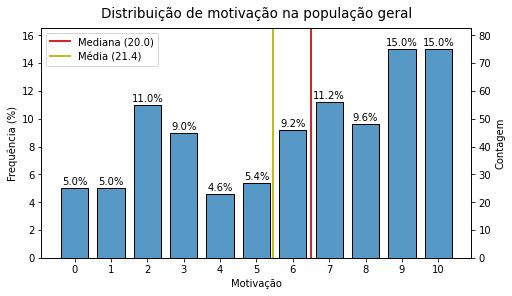

In [311]:
fig, ax1 = plt.subplots(figsize=(7, 4), constrained_layout=True)

graph = sns.histplot(data['motivação'], bins=np.arange(data['motivação'].min(), data['motivação'].max()+2, 1), ax=ax1, shrink=0.75)
graph.axvline(data['motivação'].quantile(0.5), label='Mediana', color='C3', linewidth=2, linestyle='-')
graph.axvline(data['motivação'].mean(), label='Média', color='C8', linewidth=2, linestyle='-')
graph.legend(labels=[f'Mediana ({data["idade"].quantile(0.5):.1f})', f'Média ({data["idade"].mean():.1f})'])

xticks_location = [p.get_x() + p.get_width()/2 for p in ax1.patches]
graph.set_xticks(xticks_location, range(data['motivação'].min(), data['motivação'].max()+1, 1))

ax2 = ax1.twinx()
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax1.set_ylabel('Contagem')
ax2.set_ylabel('Frequência (%)')
ax1.set_ylim(ax1.get_ylim()[0], 1.05*ax1.get_ylim()[1])
ax2.set_ylim(0, 100*(ax1.get_ylim()[1]/data['motivação'].count()))

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
    # ax1.annotate(int(y), (x.mean(), y-1), ha='center', va='top')

graph.set(xlabel='Motivação')
graph.set_title('Distribuição de motivação na população geral', pad=10, fontdict={'fontsize': 13.5, 'fontweight': 10})

plt.show()

fig.savefig('imagens/Distribuição de motivação na população geral.svg')

In [110]:
data[data['porcentagem_concluida_curso'] > 1].describe()

,idade,renda,ano_curso,numero,motivação
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,21.283186,2715.387080,4.592920,575.247788,4.212389
std,2.876844,1921.012969,0.493478,266.791536,2.106331
min,20.000000,1246.440000,4.000000,7.000000,0.000000
25%,20.000000,1729.430000,4.000000,419.000000,3.000000
50%,21.000000,2279.430000,5.000000,573.000000,4.000000
75%,21.000000,3152.870000,5.000000,840.000000,6.000000
max,45.000000,17680.450000,5.000000,994.000000,8.000000


In [112]:
print(data.describe(), '\n')
print(data['cor'].value_counts(), '\n')
print(data['sexo'].value_counts(), '\n')
print(data['escola'].value_counts(), '\n')
print(data['curso'].value_counts(), '\n')
print(data['cidade'].value_counts(), '\n')
print(data['bairro'].value_counts(), '\n')

            idade         renda   ano_curso      numero   motivação
count  500.000000     500.00000  500.000000  500.000000  500.000000
mean    21.404000    8353.38346    3.618000  564.372000    5.948000
std      4.923135   67272.57730    0.978771  286.546924    3.181437
min     19.000000      17.00000    1.000000    7.000000    0.000000
25%     19.000000    1179.99000    3.000000  325.250000    3.000000
50%     20.000000    1846.38000    4.000000  574.000000    7.000000
75%     21.000000    2759.37000    4.000000  820.000000    9.000000
max     50.000000  945542.00000    5.000000  997.000000   10.000000 

branca    430
preta      70
Name: cor, dtype: int64 

feminino     250
masculino    250
Name: sexo, dtype: int64 

privada    264
pública    236
Name: escola, dtype: int64 

história                 67
administração            66
filosofia                65
engenharia biomédica     55
medicina                 53
direito                  52
ciência da computação    52
design          

,idade,renda,ano_curso,numero,motivação
count,207.000000,207.000000,207.00000,207.000000,207.000000
mean,20.280193,2096.984879,4.00000,580.599034,5.690821
std,1.065224,611.791593,0.73074,271.637838,2.214485
min,19.000000,1232.440000,1.00000,13.000000,2.000000
25%,20.000000,1622.155000,4.00000,373.000000,4.000000
50%,20.000000,2027.980000,4.00000,574.000000,6.000000
75%,21.000000,2404.650000,4.00000,838.000000,7.000000
max,25.000000,3624.650000,5.00000,994.000000,10.000000


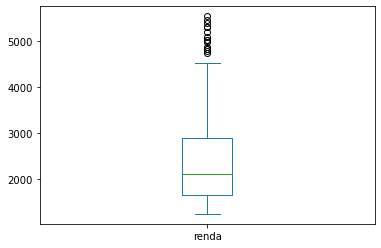

In [113]:
renda_privada = data[data['escola'] == 'privada']['renda']
renda_privada_IQR = renda_privada.quantile(0.75) - renda_privada.quantile(0.25)
renda_privada_filter = (renda_privada >= renda_privada.quantile(0.25) - 1.5*renda_privada_IQR) & (renda_privada <= renda_privada.quantile(0.75) + 1.5*renda_privada_IQR)
renda_privada[renda_privada_filter].plot.box()

data[(data['escola'] == 'privada') & (data['renda'] <= 3*1212)].describe()

### **Escolha do critério de concessão**

In [ ]:
data['motivação'].value_counts(normalize=True).sort_index(ascending=False)*100

In [ ]:
data['renda'].hist(range=(0, 4000))

In [ ]:
keys = ['renda', 'escola', 'cor', 'motivação', 'cod_curso']

In [ ]:
salario_minimo = 1212

selecao = data[data['renda'] <= 3*salario_minimo]

selecao_cor = selecao['cor'].value_counts(normalize=True)*100
selecao_escola = selecao['escola'].value_counts(normalize=True)*100
selecao_curso = selecao['cod_curso'].value_counts(normalize=True)*100

In [ ]:
selecao.describe()

In [ ]:
100*selecao['motivação'].value_counts(normalize=True).sort_index(ascending=False)

In [ ]:
print(selecao_cor, '\n')
print(selecao_escola, '\n')
print(selecao_curso, '\n')

In [ ]:
ep_pre = selecao[(selecao['cor'] == 'preta') & (selecao['escola'] == 'pública')]
ep_bra = selecao[(selecao['cor'] == 'branca') & (selecao['escola'] == 'pública')]
pri_pre = selecao[(selecao['cor'] == 'preta') & (selecao['escola'] == 'privada')]
pri_bra = selecao[(selecao['cor'] == 'branca') & (selecao['escola'] == 'privada')]

ep_pre = ep_pre.sort_values('renda')
ep_bra = ep_bra.sort_values('renda')
pri_pre = pri_pre.sort_values('renda')
pri_bra = pri_bra.sort_values('renda')

In [ ]:
ep_bra[ep_bra['motivação'] < 5]

In [ ]:
ep_pre['motivação'].value_counts()

In [ ]:
print(ep_pre.shape[0])
print(ep_bra.shape[0])
print(pri_pre.shape[0])
print(pri_bra.shape[0])